<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/nyandwi/machine_learning_complete/blob/main/6_classical_machine_learning_with_scikit-learn/3_support_vector_machines_for_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

*This notebook was created by [Jean de Dieu Nyandwi](https://twitter.com/jeande_d) for the love of machine learning community. For any feedback, errors or suggestion, he can be reached on email (johnjw7084 at gmail dot com), [Twitter](https://twitter.com/jeande_d), or [LinkedIn](https://linkedin.com/in/nyandwi).*

<a name='0'></a>
# Support Vector Machines (SVM) - Intro and SVM for Regression

Support Vector Machines are the type of supervised learning algorithms used for regression, classification and detecting outliers. SVMs are remarkably one of the powerful models in classical machine learning suited for handling complex and high dimensional datasets. 

With SVM supporting different kernels (linear, polynomial, Radial Basis Function(rbf), and sigmoid), SVM can tackle different kinds of datasets, both linear and non linear. 

While the maths behind the SVMs are beyond the scope of this notebook, here is the idea behind SVMs:

*The way SVM works can be compared to a street with a boundary line. During SVM training, SMV draws the large margin or decision boundary between classes based on the importance of each training data point. The training data points that are inside the decision boundary are called support vectors and hence the name.*

![SVM](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/1200px-Kernel_Machine.svg.png)

SMVs are widely used for classification. But to motivate that, let's start with regression. For the purpose of examining how powerful this algorithm is, we will use the same dataset that we used in linear regression notebook, and hopefully the difference in performance will be notable. 

### Contents

* [1 - Imports](#1)
* [2 - Loading the data](#2)
* [3 - Exploratory Analysis](#3)
* [4 - Preprocessing the data](#4)
* [5 - Training Support Vector Regressor](#5)
* [6 - Evaluating Support Vector Regressor](#6)
* [7 - Improving Support Vector Regressor](#7)

<a name='1'></a>
## 1 - Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

<a name='2'></a>

## 2 - Loading the data

In [2]:
data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/housing.csv'

# This require internet 

def download_read_data(path):
    
    """
     Function to retrive data from the data paths
     And to read the data as a pandas dataframe
  
    To return the dataframe
    """ 
    
      ## Only retrieve the directory of the data

    data_path =  urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(path)
    
    return data

The above function require internet to load retrieve the data. To read the data without internet, download it from the provided link and read it with Pandas read_csv function. 

In [3]:
cal_data = download_read_data(data_path)
cal_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
len(cal_data)

20640

## 3 - Exploratory Analysis

This is going to be a quick glance through the dataset. The full exploratory data analysis was done in the linear regression notebook[ADD LINK]. Before anything, let's split the data into training and test set.

In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(cal_data, test_size=0.1,random_state=20)

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

The size of training data is: 18576 
The size of testing data is: 2064


In [6]:
## Checking statistics

train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,18576.0,-119.567530,2.000581,-124.3500,-121.7900,-118.4900,-118.010000,-114.4900
latitude,18576.0,35.630217,2.133260,32.5400,33.9300,34.2600,37.710000,41.9500
housing_median_age,18576.0,28.661068,12.604039,1.0000,18.0000,29.0000,37.000000,52.0000
total_rooms,18576.0,2631.567453,2169.467450,2.0000,1445.0000,2127.0000,3149.000000,39320.0000
total_bedrooms,18390.0,537.344698,417.672864,1.0000,295.0000,435.0000,648.000000,6445.0000
population,18576.0,1422.408376,1105.486111,3.0000,785.7500,1166.0000,1725.000000,28566.0000
households,18576.0,499.277078,379.473497,1.0000,279.0000,410.0000,606.000000,6082.0000
median_income,18576.0,3.870053,1.900225,0.4999,2.5643,3.5341,4.742725,15.0001
median_house_value,18576.0,206881.011305,115237.605962,14999.0000,120000.0000,179800.0000,264700.000000,500001.0000


In [7]:
## Checking missing values

train_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        186
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# Checking Values in the Categorical Feature(s)

train_data['ocean_proximity'].value_counts()

<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: ocean_proximity, dtype: int64

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

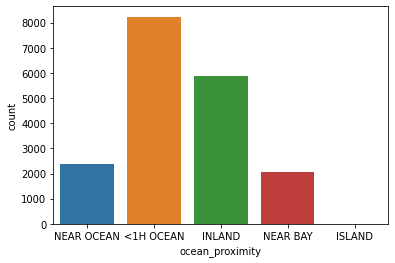

In [9]:
sns.countplot(data=train_data, x='ocean_proximity')

Total bedroom is the only feature having missing values. Here is its distribution. 

<AxesSubplot:ylabel='Frequency'>

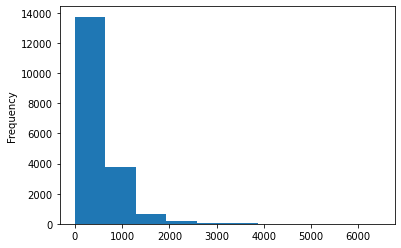

In [10]:
train_data['total_bedrooms'].plot(kind='hist')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

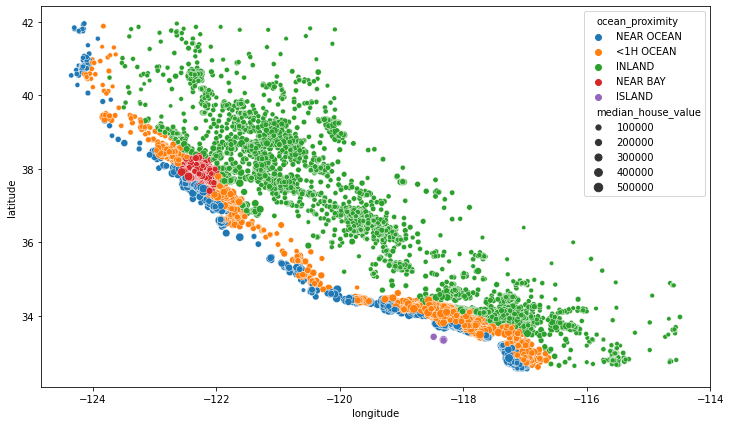

In [11]:
# Plotting geographical features

plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude', hue='ocean_proximity', 
                size='median_house_value')

<a name='4'></a>

## 4 - Data Preprocessing 

To do: 
* Handle missing values
* Encode categorical features
* Scale the features
* Everything into pipeline
   
    

In [12]:
# Getting training input data and labels

training_input_data = train_data.drop('median_house_value', axis=1)
training_labels = train_data['median_house_value']

# Numerical features 

num_feats = training_input_data.drop('ocean_proximity', axis=1)

# Categorical features 
cat_feats = training_input_data[['ocean_proximity']]

In [13]:
# Handle missing values 

from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipe = Pipeline([
      ('imputer', SimpleImputer(strategy='mean')),
      ('scaler', StandardScaler())

    ])

num_preprocessed = num_pipe.fit_transform(num_feats)

In [14]:
# Pipeline to combine the numerical pipeline and also encode categorical features 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# The transformer requires lists of features

num_list = list(num_feats)
cat_list = list(cat_feats)

final_pipe = ColumnTransformer([
    ('num', num_pipe, num_list),
    ('cat', OneHotEncoder(), cat_list)
])

training_data_preprocessed = final_pipe.fit_transform(training_input_data)

In [15]:
training_data_preprocessed

array([[ 0.67858615, -0.85796668,  0.97899282, ...,  0.        ,
         0.        ,  1.        ],
       [-0.93598814,  0.41242353,  0.18557502, ...,  0.        ,
         0.        ,  0.        ],
       [-1.45585107,  0.9187045 ,  0.02689146, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.27342931, -1.32674535,  0.18557502, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64859406, -0.71733307,  0.97899282, ...,  0.        ,
         0.        ,  0.        ],
       [-1.44085502,  1.01246024,  1.37570172, ...,  0.        ,
         1.        ,  0.        ]])

<a name='5'></a>

## 5 - Training Support Vector Regressor

In regression, instead of separating the classes with decision boundary  like in classification, SVR fits the training data points on the boundary margin but keep them off. 

We can implement it quite easily with Scikit-Learn.

In [16]:
from sklearn.svm import LinearSVR, SVR

In [17]:
lin_svr = LinearSVR()
lin_svr.fit(training_data_preprocessed, training_labels)

LinearSVR()

We can also use nonlinear SVM with a polynomial kernel function.

In [18]:
poly_svr = SVR(kernel='poly')
poly_svr.fit(training_data_preprocessed, training_labels)

SVR(kernel='poly')

<a name='6'></a>

## 6 - Evaluating Support Vector Regressor

Let us evaluate the two models we created on the training set before evaluating on the test set. This is a good practice. Since finding a good model can take many iterations of improvements, it's not advised to touch the test set until the model is good enough. Otherwise it would fail to make predictions on the new data. 

As always, we evaluate regression models with mean squarred error, but the commonly used one is root mean squarred error. 

In [19]:
from sklearn.metrics import mean_squared_error

predictions = lin_svr.predict(training_data_preprocessed)
mse = mean_squared_error(training_labels, predictions)
rmse = np.sqrt(mse)
rmse

215682.86713461558

That's too high error. Let's see how SVR with polynomial kernel will perform. 

In [20]:
predictions = poly_svr.predict(training_data_preprocessed)
mse = mean_squared_error(training_labels, predictions)
rmse = np.sqrt(mse)
rmse

117513.38828582528

It did well than the former. For now, we can try to improve this with Randomized Search where we can find the best parameters. Let's do that!

<a name='7'></a>

## 7 - Improving Support Vector Regressor

Let use Randomized Search to improve the SVR model. Few notes about the parameters:

* *Gamma(y)*: This is a regularization hyperparameter. When gamma is small, the model can underfit. It is too high, model can overfit. 
* *C*: It's same as gamma. It is a regularization hyperparameter. When C is low, there is much regularization. When C is high, there is low regularization. 
* *epsilon*: is used to control the width of the street.

In [21]:
from sklearn.model_selection import RandomizedSearchCV


params = {'gamma':[0.0001, 0.1],'C':[1,1000], 'epsilon':[0,0.5], 'degree':[2,5]}

rnd_search = RandomizedSearchCV(SVR(), params, n_iter=10, verbose=2, cv=3, random_state=42)

rnd_search.fit(training_data_preprocessed, training_labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .............C=1, degree=2, epsilon=0, gamma=0.0001; total time=  13.7s
[CV] END .............C=1, degree=2, epsilon=0, gamma=0.0001; total time=  13.5s
[CV] END .............C=1, degree=2, epsilon=0, gamma=0.0001; total time=  13.6s
[CV] END ................C=1, degree=2, epsilon=0, gamma=0.1; total time=  13.6s
[CV] END ................C=1, degree=2, epsilon=0, gamma=0.1; total time=  13.6s
[CV] END ................C=1, degree=2, epsilon=0, gamma=0.1; total time=  13.7s
[CV] END ................C=1, degree=5, epsilon=0, gamma=0.1; total time=  13.6s
[CV] END ................C=1, degree=5, epsilon=0, gamma=0.1; total time=  13.6s
[CV] END ................C=1, degree=5, epsilon=0, gamma=0.1; total time=  13.6s
[CV] END ........C=1000, degree=5, epsilon=0.5, gamma=0.0001; total time=  13.7s
[CV] END ........C=1000, degree=5, epsilon=0.5, gamma=0.0001; total time=  13.7s
[CV] END ........C=1000, degree=5, epsilon=0.5, 

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': [1, 1000], 'degree': [2, 5],
                                        'epsilon': [0, 0.5],
                                        'gamma': [0.0001, 0.1]},
                   random_state=42, verbose=2)

We can now find the best parameters

In [22]:
rnd_search.best_params_

{'gamma': 0.1, 'epsilon': 0, 'degree': 5, 'C': 1000}

In [23]:
svr_rnd = rnd_search.best_estimator_.fit(training_data_preprocessed, training_labels)

Now, let's evaluate it on the training set

In [24]:
predictions = svr_rnd.predict(training_data_preprocessed)
mse = mean_squared_error(training_labels, predictions)
rmse = np.sqrt(mse)
rmse

68684.15262765526

Wow, this is much bettter. We were able to improve reduce the root mean squarred error from `$117,513` to `$68,684`. 

Now, we can evaluate the model on the test set. We will have to transform it the same way we transformed the training set for the prediction to be possible. 

In [25]:
test_input_data = test_data.drop('median_house_value', axis=1)
test_labels = test_data['median_house_value']


test_preprocessed = final_pipe.transform(test_input_data)

In [26]:
test_pred = svr_rnd.predict(test_preprocessed)
test_mse = mean_squared_error(test_labels,test_pred)

test_rmse = np.sqrt(test_mse)
test_rmse

68478.07737338323

That's is not really bad.

This is the end of the notebook. It was a practical introduction to using Support Vector Machines for regression. In the next lab, we will take a further step, where we will do classification with SVM. 

### [BACK TO TOP](#0)